# Explore here

In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns




url = "https://breathecode.herokuapp.com/asset/internal-link?id=929&path=medical_insurance_cost.csv"


In [54]:
df = pd.read_csv(url)

In [55]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [57]:
print("Nulos por columna:\n", df.isna().sum())


Nulos por columna:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [58]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [59]:
numeric_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker', 'region']

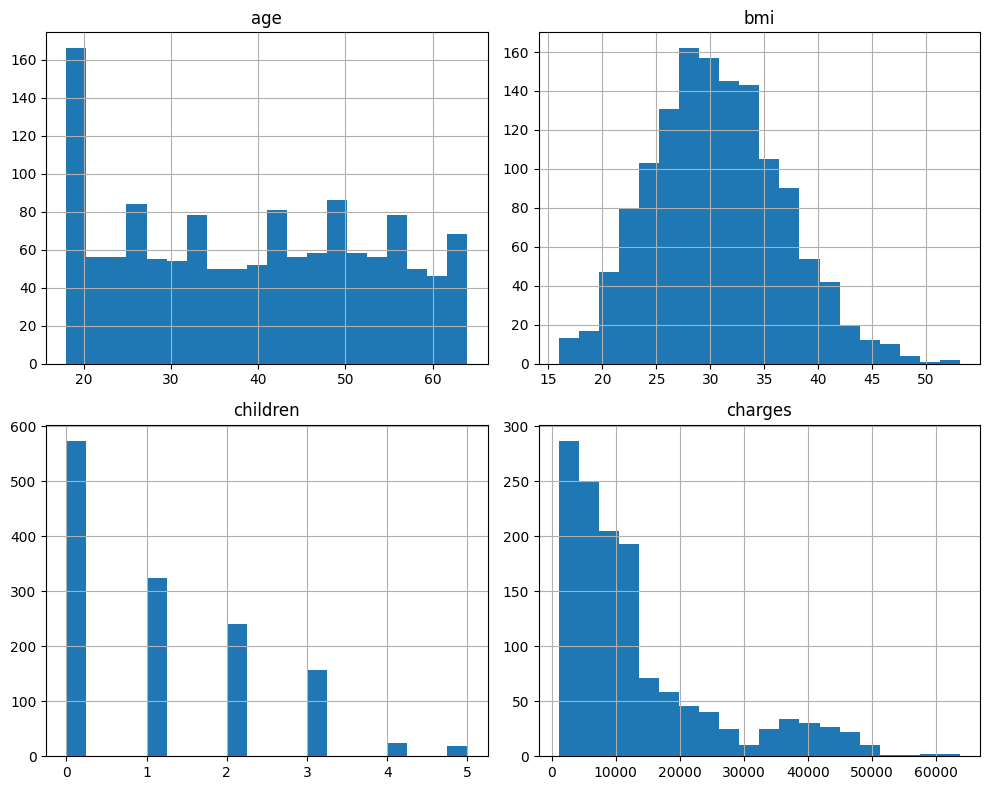

In [60]:
num_cols = ['age', 'bmi', 'children', 'charges']
df[num_cols].hist(bins=20, figsize=(10,8))
plt.tight_layout()


Valores únicos en sex:
 sex
male      676
female    662
Name: count, dtype: int64


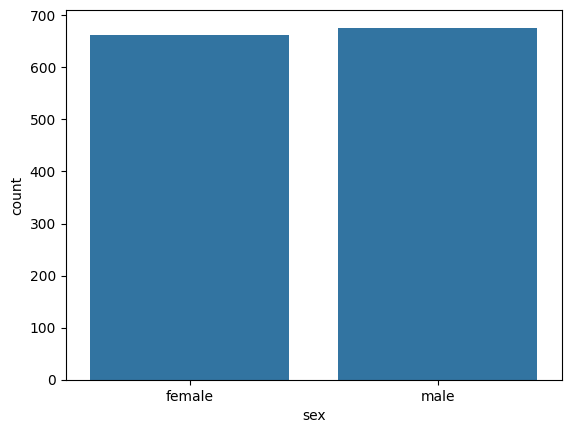


Valores únicos en smoker:
 smoker
no     1064
yes     274
Name: count, dtype: int64


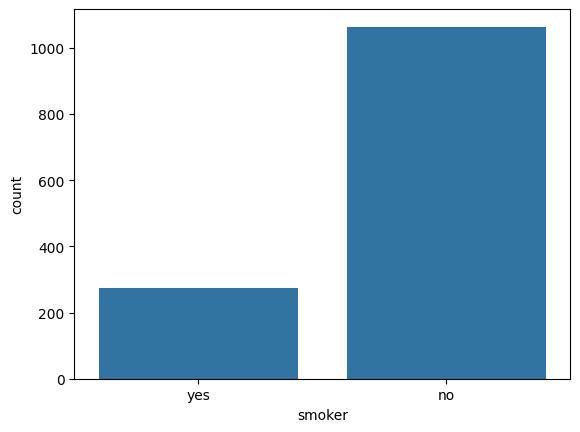


Valores únicos en region:
 region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


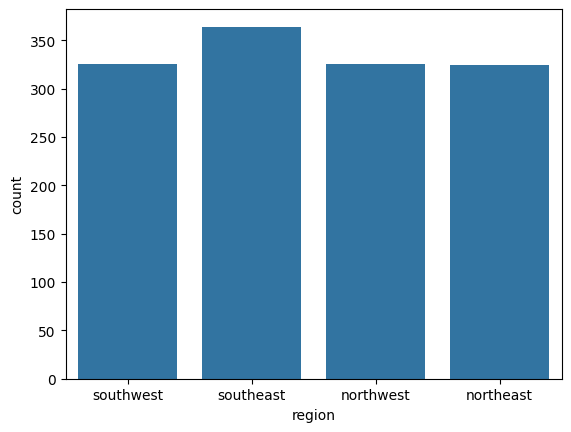

In [61]:
cat_cols = ['sex', 'smoker', 'region']
for c in cat_cols:
    print(f"\nValores únicos en {c}:\n", df[c].value_counts())
    sns.countplot(data=df, x=c)
    plt.show()

               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


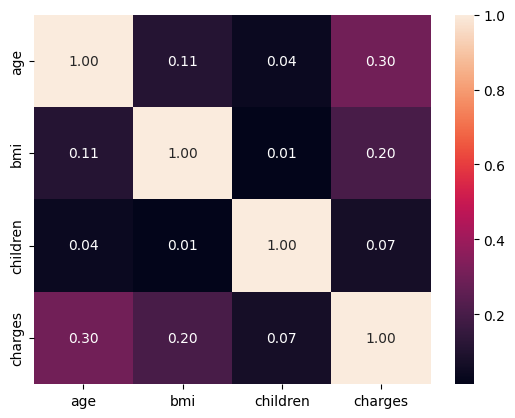

In [62]:
corr = df[num_cols].corr()
print(corr)
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

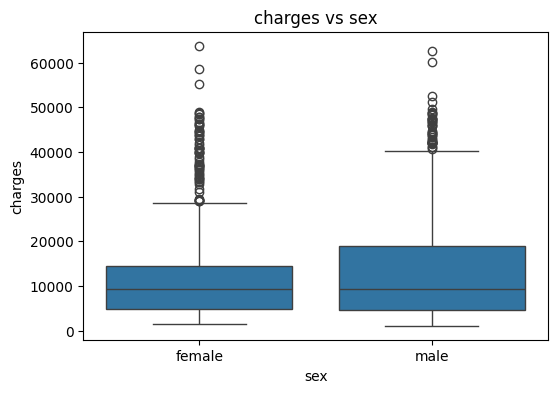

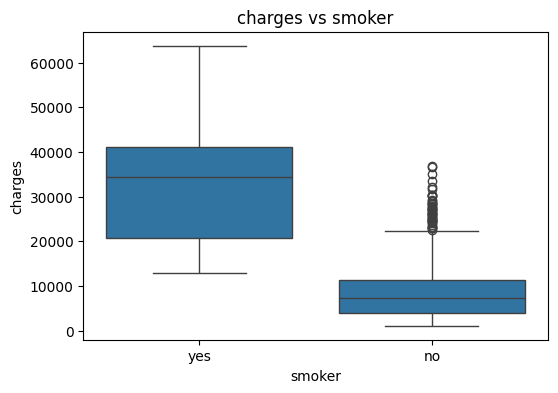

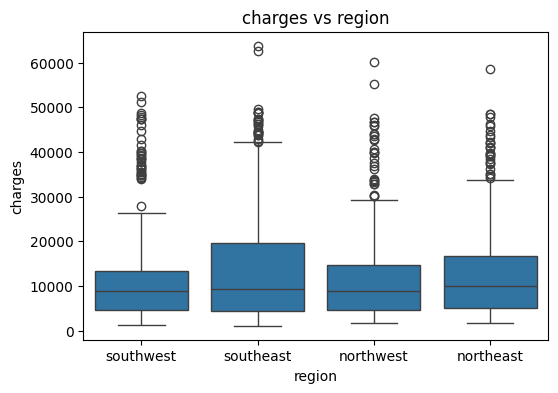

In [63]:
for c in cat_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x=c, y='charges')
    plt.title(f'charges vs {c}')
    plt.show()

In [64]:
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
print("bmi outlier bounds:", lower, upper)
df[(df['bmi'] < lower) | (df['bmi'] > upper)].shape


bmi outlier bounds: 13.7 47.290000000000006


(9, 7)

In [ ]:
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', sparse_output=False)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [66]:
# Dividir en variables predictoras (X) y variable objetivo (y)
X = df.drop(columns='charges')
y = df['charges']

# División del dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [71]:
# Función para entrenar y evaluar un modelo
def evaluar_modelo(nombre, modelo):
    pipe = Pipeline(steps=[('preprocessor', preprocessor), ('model', modelo)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # compatible con cualquier versión
    r2 = r2_score(y_test, y_pred)
    print(f"📊 {nombre}")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²: {r2:.3f}")
    print("-"*30)
    
    return {"Modelo": nombre, "MAE": mae, "RMSE": rmse, "R2": r2}

In [72]:
# Lista de modelos a probar
modelos = [
    ("Regresión Lineal", LinearRegression()),
    ("Ridge", Ridge(alpha=1.0)),
    ("Random Forest", RandomForestRegressor(random_state=42))
]

In [73]:

# Entrenar y guardar resultados
resultados = [evaluar_modelo(nombre, modelo) for nombre, modelo in modelos]


📊 Regresión Lineal
MAE: 4181.19
RMSE: 5796.28
R²: 0.784
------------------------------
📊 Ridge
MAE: 4193.20
RMSE: 5800.46
R²: 0.783
------------------------------
📊 Random Forest
MAE: 2543.98
RMSE: 4567.78
R²: 0.866
------------------------------


In [74]:
# Mostrar resultados comparativos
resultados_df = pd.DataFrame(resultados)
resultados_df

,Modelo,MAE,RMSE,R2
0,Regresión Lineal,4181.194474,5796.284659,0.783593
1,Ridge,4193.195353,5800.464938,0.783281
2,Random Forest,2543.975825,4567.775116,0.865606


Conclusión: El mejor modelo es Random Forest, porque tiene menor MAE/RMSE y R² más alto.

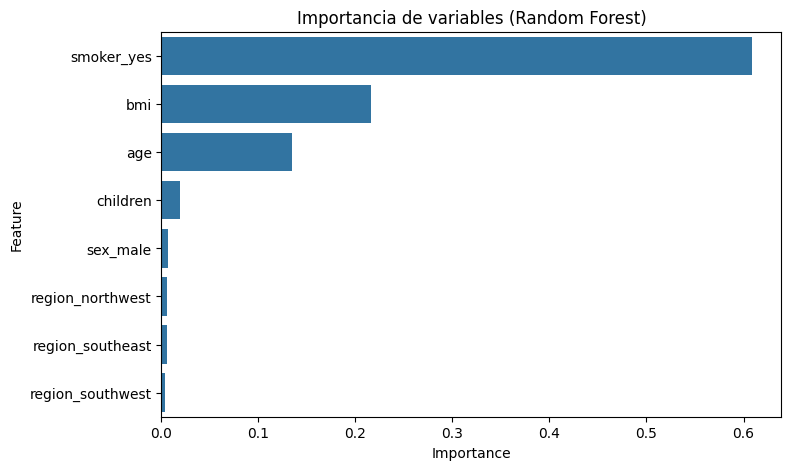

In [ ]:
# Entrenar Random Forest final
final_rf = Pipeline(steps=[('preprocessor', preprocessor), ('model', RandomForestRegressor(random_state=42))])
final_rf.fit(X_train, y_train)

# Nombres de columnas tras OneHotEncoder
encoded_cols = final_rf.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features)
all_features = numeric_features + list(encoded_cols)

# Importancia de variables
importances = final_rf.named_steps['model'].feature_importances_
feat_importance = pd.DataFrame({'Feature': all_features, 'Importance': importances}).sort_values('Importance', ascending=False)

# Mostrar gráfico
plt.figure(figsize=(8,5))
sns.barplot(data=feat_importance, x='Importance', y='Feature')
plt.title('Importancia de variables (Random Forest)')
plt.show()

la gráfica muestra los valores más importates